In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Rates of Basement Flooding Calls vs. Street Flooding

Seems like basement and street flooding calls have different patterns across the city. Street flooding calls seem to be more distributed throughout the city, and occur more regularly than basement calls. Looking at whether or not specific areas have much higher rates than others of basement flooding calls vs. street flooding calls.

In [2]:
wib_comm_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
wos_comm_df = pd.read_csv('311_data/wos_calls_311_comm.csv')
wib_comm_df.head()

,Created Date,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
0,2000-01-01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2000-01-03,0,0,0,4,1,3,1,1,0,...,1,0,0,0,0,0,2,1,2,2
3,2000-01-04,0,0,0,0,1,4,1,0,0,...,3,0,0,1,0,0,0,0,1,0
4,2000-01-05,0,0,0,1,1,3,0,0,0,...,1,0,0,0,0,0,1,0,1,1


In [3]:
wib_comm_stack = wib_comm_df[wib_comm_df.columns.values[1:]].stack().reset_index()
wos_comm_stack = wos_comm_df[wos_comm_df.columns.values[1:]].stack().reset_index()
wib_comm_stack.head()

,level_0,level_1,0
0,0,ALBANY PARK,0
1,0,ARCHER HEIGHTS,0
2,0,ARMOUR SQUARE,0
3,0,ASHBURN,0
4,0,AUBURN GRESHAM,0


In [4]:
wib_comm_grp = pd.DataFrame(wib_comm_stack.groupby(['level_1'])[0].sum()).reset_index()
wib_comm_grp = wib_comm_grp.rename(columns={'level_1':'Community Area', 0: 'Basement Calls'})
wos_comm_grp = pd.DataFrame(wos_comm_stack.groupby(['level_1'])[0].sum()).reset_index()
wos_comm_grp = wos_comm_grp.rename(columns={'level_1':'Community Area', 0: 'Street Calls'})
comm_grp_merge = wib_comm_grp.merge(wos_comm_grp, on='Community Area')
comm_grp_merge.head()

,Community Area,Basement Calls,Street Calls
0,ALBANY PARK,1949,2683
1,ARCHER HEIGHTS,720,568
2,ARMOUR SQUARE,216,272
3,ASHBURN,4115,2840
4,AUBURN GRESHAM,5565,3621


In [5]:
## Making basement to street call ratio column
comm_grp_merge['Basement-Street Ratio'] = comm_grp_merge['Basement Calls'] / comm_grp_merge['Street Calls']
comm_grp_merge.head()

,Community Area,Basement Calls,Street Calls,Basement-Street Ratio
0,ALBANY PARK,1949,2683,0.726426
1,ARCHER HEIGHTS,720,568,1.267606
2,ARMOUR SQUARE,216,272,0.794118
3,ASHBURN,4115,2840,1.448944
4,AUBURN GRESHAM,5565,3621,1.536868


In [6]:
comm_more_basement = comm_grp_merge.sort_values(by='Basement-Street Ratio', ascending=False)[:15]
comm_more_street = comm_grp_merge.sort_values(by='Basement-Street Ratio')[:15]
comm_more_basement.head()

,Community Area,Basement Calls,Street Calls,Basement-Street Ratio
58,PULLMAN,1435,508,2.824803
12,BURNSIDE,775,283,2.738516
13,CALUMET HEIGHTS,3666,1424,2.574438
72,WEST LAWN,2693,1217,2.212818
15,CHICAGO LAWN,6453,3326,1.940168


### Community Areas by Basement to Street Flood Call Ratio

From looking at the community areas with much more basement flooding calls than street flooding calls and vice versa, it seems like lower-income neighborhoods on the south side generally have more basement flooding calls, while higher-income neighborhoods on the north side have more for street flooding.

Anecdotally, this makes sense from the area names, and overall it suggests that street flooding is more of a typical 311 call that's subject to change over neighborhoods. Basement flooding matches up with FEMA data though, so it seems like street flooding should be ignored for most analyses in favor of basement flooding to look at the actual distribution of flooding events across the city.

#### Note for WBEZ Data

This also means that the WBEZ data is more off than previously expected because it combined both basement and street flooding. Only looking at basement flooding actualy changes the top zip codes substantially.

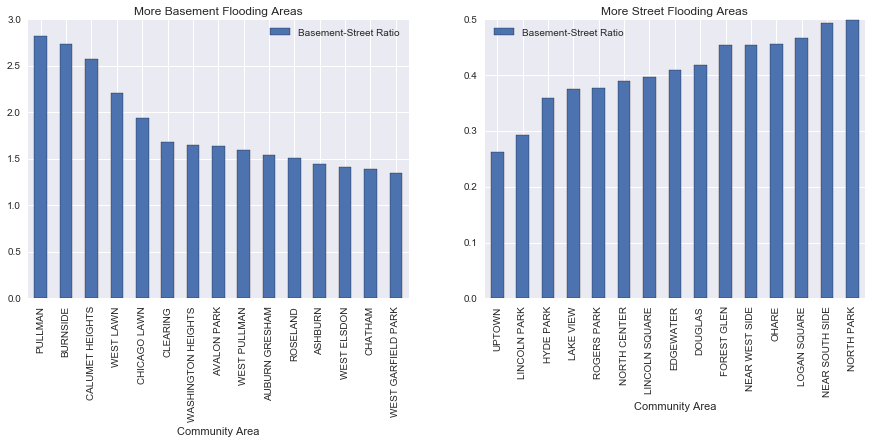

In [8]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]
comm_more_basement.plot(title='More Basement Flooding Areas', ax=axs[0], kind='bar',x='Community Area',y='Basement-Street Ratio')
comm_more_street.plot(title='More Street Flooding Areas', ax=axs[1], kind='bar',x='Community Area',y='Basement-Street Ratio')